In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [11]:
import os

data_path = os.path.sep.join(['c:', 'kurssit', 'Syvaoppiminen', 'PetImages'])
train_path = os.path.sep.join([data_path, 'train'])
validation_path = os.path.sep.join([data_path, 'validation'])
test_path = os.path.sep.join([data_path, 'test'])

In [40]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    train_path , image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory(
    validation_path, image_size=(180, 180), batch_size=32)
test_dataset = image_dataset_from_directory(
    test_path, image_size=(180, 180), batch_size=32)



Found 1998 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [32]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape: ", data_batch.shape)
    print("labels batch shape: ", labels_batch.shape)
    break

data batch shape:  (32, 180, 180, 3)
labels batch shape:  (32,)


In [16]:
inputs = keras.Input(shape=(180, 180, 3))
hidden = layers.Rescaling(1./255)(inputs)
hidden = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(hidden)
hidden = layers.MaxPooling2D(pool_size=2)(hidden)
hidden = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(hidden)
hidden = layers.MaxPooling2D(pool_size=2)(hidden)
hidden = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(hidden)
hidden = layers.MaxPooling2D(pool_size=2)(hidden)
hidden = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(hidden)
hidden = layers.MaxPooling2D(pool_size=2)(hidden)
hidden = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(hidden)
hidden = layers.MaxPooling2D(pool_size=2)(hidden)
hidden = layers.Flatten()(hidden)
outputs = layers.Dense(1, activation="sigmoid")(hidden)
model = keras.Model(inputs=inputs, outputs=outputs)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [18]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics= ["accuracy"])

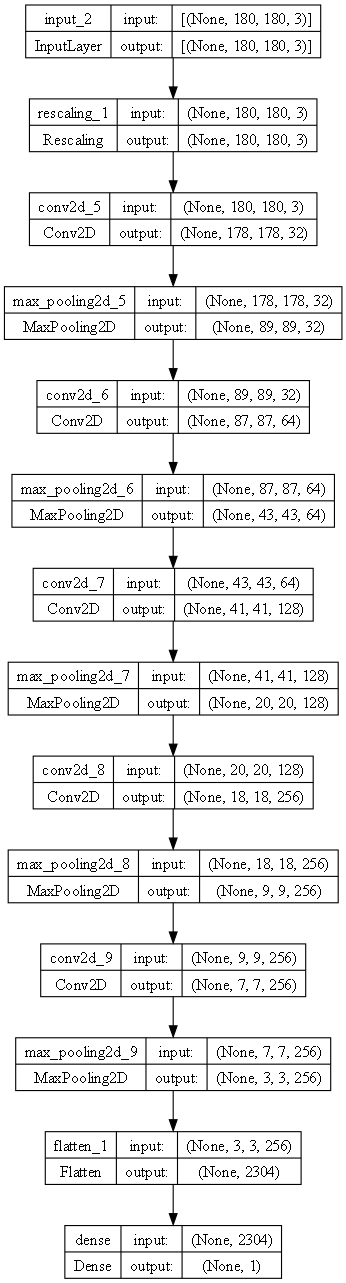

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, dpi=80)

In [33]:
model.fit(train_dataset, validation_data=validation_dataset, batch_size=32, epochs = 8)

Epoch 1/8
63/63 [==============================] - 84s 1s/step - loss: 0.5870 - accuracy: 0.6962 - val_loss: 0.5870 - val_accuracy: 0.7040
Epoch 2/8
63/63 [==============================] - 83s 1s/step - loss: 0.5536 - accuracy: 0.6997 - val_loss: 0.6118 - val_accuracy: 0.6970
Epoch 3/8
63/63 [==============================] - 83s 1s/step - loss: 0.5317 - accuracy: 0.7352 - val_loss: 0.8704 - val_accuracy: 0.6080
Epoch 4/8
63/63 [==============================] - 84s 1s/step - loss: 0.4820 - accuracy: 0.7648 - val_loss: 0.6226 - val_accuracy: 0.6960
Epoch 5/8
63/63 [==============================] - 83s 1s/step - loss: 0.4151 - accuracy: 0.8138 - val_loss: 0.6292 - val_accuracy: 0.7220
Epoch 6/8
63/63 [==============================] - 83s 1s/step - loss: 0.3676 - accuracy: 0.8398 - val_loss: 0.6065 - val_accuracy: 0.7190
Epoch 7/8
63/63 [==============================] - 84s 1s/step - loss: 0.2901 - accuracy: 0.8769 - val_loss: 0.6658 - val_accuracy: 0.7350
Epoch 8/8
63/63 [==========

In [41]:
loss, label_loss, bbox_loss, label_acc = model.evaluate(test_dataset)


 9/63 [===>..........................] - ETA: 17s - loss: 0.8455 - accuracy: 0.6632

InvalidArgumentError: Graph execution error:

Input size should match (header_size + row_size * abs_height) but they differ by 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_3471]

In [ ]:
print(f"Test accuracy: {label_acc:.3f}")